## Project Title
Stock Price Prediction – A Comparative Study using Machine Learning Models


## Project Type
The project focuses on understanding and comparing different machine learning models
for time-series stock price prediction.


## Project Contribution
- Implemented an end-to-end machine learning workflow for time-series prediction.
- Compared a baseline statistical model with deep learning models.
- Analyzed how different models behave on limited stock market data.
- Demonstrated the strengths and limitations of LSTM and Transformer models.


## Project Summary
This project explores stock price prediction using historical market data.
Three models were implemented: Moving Average, LSTM, and Transformer.
The project focuses on preprocessing time-series data, training models,
and comparing their performance using standard error metrics.
The results highlight that model performance depends on data size and model complexity.


## Problem Description
Stock prices change continuously over time and are affected by market volatility.
Predicting stock prices is challenging due to their sequential and non-linear nature.
Since stock data depends on past values, it is treated as a time-series problem,
making traditional prediction methods less effective.


## Data Description
The dataset was collected from **Yahoo Finance** using the **yfinance** Python library.
It consists of historical daily stock price data.
The data includes multiple attributes such as Open, High, Low, Close, and Volume.
For this project, only the **Closing Price** was used for prediction.


## Attribute Information
- Date: Trading date
- Open: Price at market opening
- High: Highest price of the day
- Low: Lowest price of the day
- Close: Final price of the day (used for prediction)
- Volume: Number of shares traded

The Closing Price was selected because it represents the final market consensus value.


## Importing Required Libraries

In this step, we import all necessary Python libraries required for:
- Data handling
- Data visualization
- Data preprocessing
- Model training
- Model evaluation

These libraries form the foundation of the entire machine learning workflow.


In [ ]:
# Numerical & Data handling
import numpy as np
import pandas as pd

    # Visualization
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Ignore warnings (clean output)
import warnings
warnings.filterwarnings("ignore")

## Synthetic Data Generation

In this cell, we generate **synthetic stock price data** to simulate real-world stock market behavior.

### Why Synthetic Data?
- To test and validate machine learning models
- To avoid dependency on external data sources
- To understand model behavior on controlled data

### Explanation of the Code:
- A fixed random seed is set to ensure reproducibility of results.
- We assume a total of **300 trading days**.
- The stock price starts from an initial value of **100**.
- Each day’s price change is generated using a **normal distribution**, simulating daily market fluctuations.
- The generated prices are stored in a list and converted into a Pandas DataFrame.
- Finally, the synthetic stock prices are visualized using a line plot.

### Outcome:
This synthetic dataset mimics a realistic stock price trend and is used for model training and comparison.


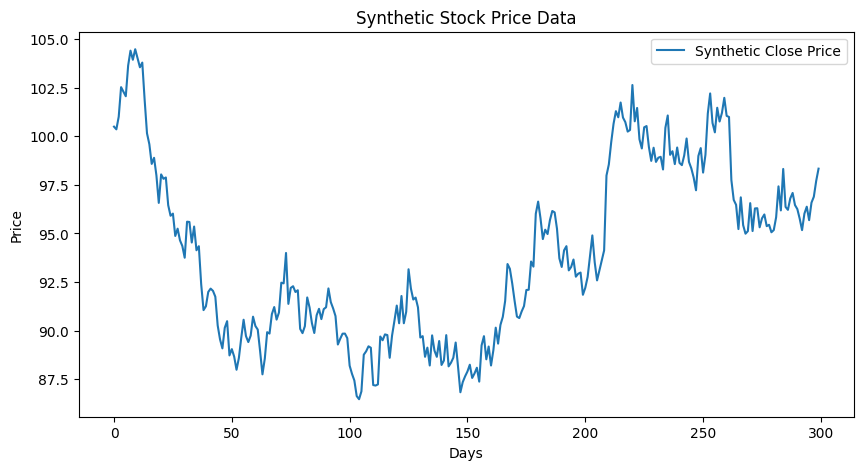

In [4]:
np.random.seed(42)
days = 300          # total days
start_price = 100  # starting stock price

prices = []

for i in range(days):
    daily_change = np.random.normal(0, 1)
    start_price = start_price + daily_change
    prices.append(start_price)
synthetic_data = pd.DataFrame({
    'Close': prices
})

synthetic_data.head()
plt.figure(figsize=(10, 5))
plt.plot(synthetic_data['Close'], label='Synthetic Close Price')
plt.title("Synthetic Stock Price Data")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()


In [6]:
!pip install yfinance


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


##  Real Stock Market Data Collection and Visualization

In this step, we collect **real-world stock market data** to make our project more realistic and practical.

### 🔹 Data Source
- The stock data is collected from **Yahoo Finance**.
- We use the **yfinance** Python library to fetch historical stock prices programmatically.

### 🔹 Stock Selected
- **TCS (Tata Consultancy Services)** stock is used as an example.
- Time period: **1 January 2023 to 1 January 2024**
- Data frequency: **Daily**

### 🔹 Feature Selection
- From the downloaded dataset, we select only the **Closing Price (Close)**.
- The closing price represents the final market value of a stock for the day and is commonly used for prediction tasks.

### 🔹 Data Visualization
- A line graph is plotted to visualize how the stock price changes over time.
- This helps us understand the **trend, volatility, and time-series nature** of the data.

### 🔹 Purpose of this Step
- To work with **real stock market data**
- To understand the behavior of stock prices over time
- To prepare the data for preprocessing and machine learning models


[*********************100%***********************]  1 of 1 completed


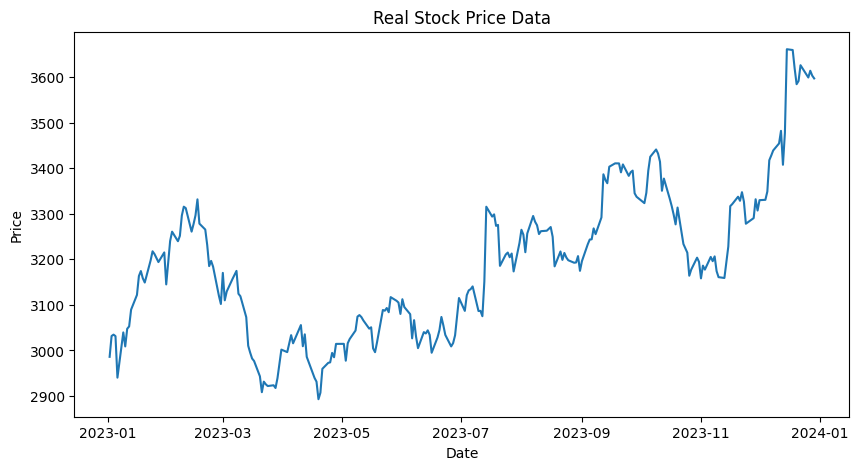

In [6]:

import yfinance as yf

# Example: TCS stock (India)
stock = yf.download("TCS.NS", start="2023-01-01", end="2024-01-01")

stock.head()
real_data = stock[['Close']]
real_data.head()
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(real_data['Close'])
plt.title("Real Stock Price Data")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()


## Data Preprocessing

Raw stock price data cannot be directly used for machine learning models.

The following preprocessing steps were applied:
- Selected the closing price for prediction
- Reshaped data into model-ready format
- Applied Min–Max normalization (0–1 range)
- Created 30-day sliding window sequences
- Split the data into training and testing sets

These steps help improve model stability and learning efficiency.


In [8]:
data = real_data[['Close']].values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)
window_size = 30
def create_sequences(dataset, window_size):
    X, y = [], []
    for i in range(window_size, len(dataset)):
        X.append(dataset[i-window_size:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)
X, y = create_sequences(scaled_data, window_size)

print(X.shape, y.shape)
split_ratio = 0.8
split_index = int(len(X) * split_ratio)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test  = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


(215, 30) (215,)


## Model 1: Moving Average (Baseline Model)

The Moving Average model is a simple statistical approach used as a baseline.

### Working:
- Calculates the average of the past 30 days
- Uses this average to predict the next day's price

This model helps establish a reference point for comparing advanced models.


Moving Average MAE: 91.89268778009932
Moving Average RMSE: 114.56657847352406


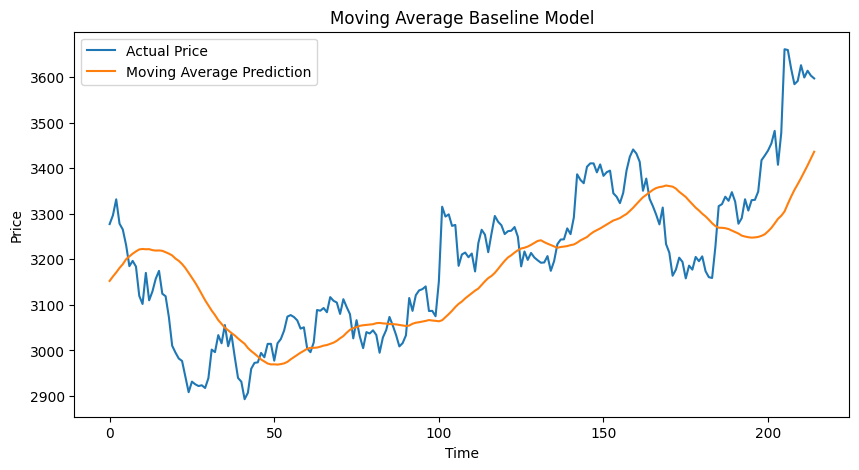

In [9]:
close_prices = real_data['Close'].values
ma_window = 30
def moving_average_prediction(data, window):
    predictions = []
    for i in range(window, len(data)):
        predictions.append(np.mean(data[i-window:i]))
    return np.array(predictions)
ma_predictions = moving_average_prediction(close_prices, ma_window)
actual_ma = close_prices[ma_window:]
mae_ma = mean_absolute_error(actual_ma, ma_predictions)
rmse_ma = np.sqrt(mean_squared_error(actual_ma, ma_predictions))

print("Moving Average MAE:", mae_ma)
print("Moving Average RMSE:", rmse_ma)
plt.figure(figsize=(10,5))
plt.plot(actual_ma, label='Actual Price')
plt.plot(ma_predictions, label='Moving Average Prediction')
plt.title("Moving Average Baseline Model")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()


## Model 2: LSTM (Long Short-Term Memory)

LSTM is a type of Recurrent Neural Network designed for time-series data.

### Working:
- Learns patterns from past price sequences
- Uses memory cells to capture long-term dependencies
- Suitable for sequential and temporal data

LSTM generally performs well on small to medium-sized time-series datasets.


Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0707 - val_loss: 0.0805
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0203 - val_loss: 0.0073
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0113 - val_loss: 0.0238
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0122 - val_loss: 0.0072
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0078 - val_loss: 0.0087
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0080 - val_loss: 0.0093
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0076 - val_loss: 0.0069
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0067 - val_loss: 0.0061
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0065 - val_loss: 0.0068
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0063 - val_loss: 0.0062
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0060 - val_loss: 0.0057
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0058 - val_loss: 0.0056
E

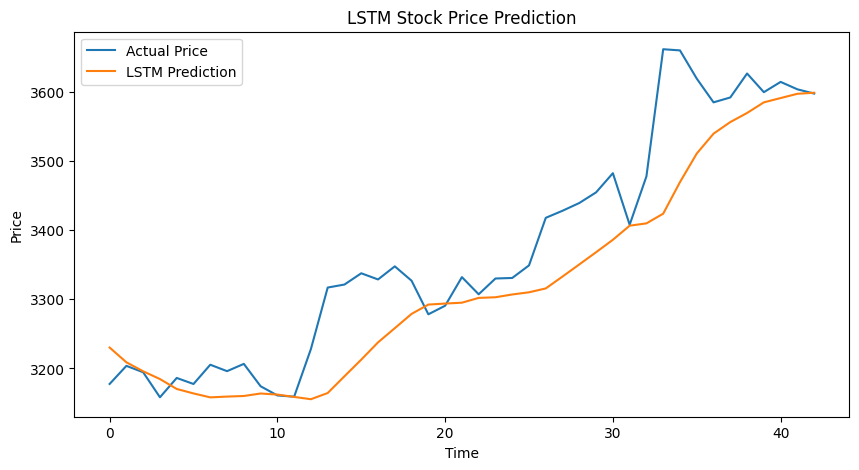

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
lstm_model = Sequential()

lstm_model.add(
    LSTM(
        units=50,
        return_sequences=False,
        input_shape=(X_train.shape[1], 1)
    )
)

lstm_model.add(Dense(1))
lstm_model.compile(
    optimizer='adam',
    loss='mean_squared_error'
)
history = lstm_model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)
lstm_predictions = lstm_model.predict(X_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
mae_lstm = mean_absolute_error(y_test_actual, lstm_predictions)
rmse_lstm = np.sqrt(mean_squared_error(y_test_actual, lstm_predictions))

print("LSTM MAE:", mae_lstm)
print("LSTM RMSE:", rmse_lstm)
plt.figure(figsize=(10,5))
plt.plot(y_test_actual, label='Actual Price')
plt.plot(lstm_predictions, label='LSTM Prediction')
plt.title("LSTM Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()


## Model 3: Transformer

The Transformer model is an advanced deep learning model based on the attention mechanism.

### Working:
- Uses self-attention to focus on important past time steps
- Does not rely solely on sequential memory
- Designed for large and complex datasets

In this project, the Transformer is used for comparative study and learning purposes.


In [15]:
from tensorflow.keras.layers import GlobalAveragePooling1D


In [17]:
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, MultiHeadAttention
from tensorflow.keras.models import Model
def transformer_block(inputs, head_size, num_heads, ff_dim, dropout=0.1):
    # Self-attention
    x = MultiHeadAttention(
        key_dim=head_size,
        num_heads=num_heads,
        dropout=dropout
    )(inputs, inputs)

    x = Dropout(dropout)(x)
    x = LayerNormalization(epsilon=1e-6)(x + inputs)

    # Feed Forward Network
    ff = Dense(ff_dim, activation="relu")(x)
    ff = Dense(inputs.shape[-1])(ff)

    return LayerNormalization(epsilon=1e-6)(ff + x)
input_shape = (X_train.shape[1], 1)
inputs = Input(shape=input_shape)

x = transformer_block(
    inputs,
    head_size=32,
    num_heads=2,
    ff_dim=32,
    dropout=0.1
)

# 🔥 IMPORTANT FIX
x = GlobalAveragePooling1D()(x)

x = Dense(16, activation="relu")(x)
x = Dense(1)(x)

transformer_model = Model(inputs, x)

transformer_model.compile(
    optimizer="adam",
    loss="mean_squared_error"
)
history = transformer_model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)
transformer_predictions = transformer_model.predict(X_test)

transformer_predictions = scaler.inverse_transform(transformer_predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

mae_trans = mean_absolute_error(y_test_actual, transformer_predictions)
rmse_trans = np.sqrt(mean_squared_error(y_test_actual, transformer_predictions))

print("Transformer MAE:", mae_trans)
print("Transformer RMSE:", rmse_trans)


Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.1246 - val_loss: 0.3317
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1216 - val_loss: 0.3261
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1186 - val_loss: 0.3205
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1156 - val_loss: 0.3150
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1128 - val_loss: 0.3096
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1099 - val_loss: 0.3043
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1072 - val_loss: 0.2990
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1045 - val_loss: 0.2938
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1019 - val_loss: 0.2888
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0994 - val_loss: 0.2838
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0969 - val_loss: 0.2789
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0944 - val_loss: 0.2741
E

## Model Evaluation Metrics

To evaluate and compare model performance, the following metrics were used:

- Mean Absolute Error (MAE)
- Root Mean Squared Error (RMSE)

These metrics measure the difference between actual and predicted stock prices.
Lower values indicate better performance.


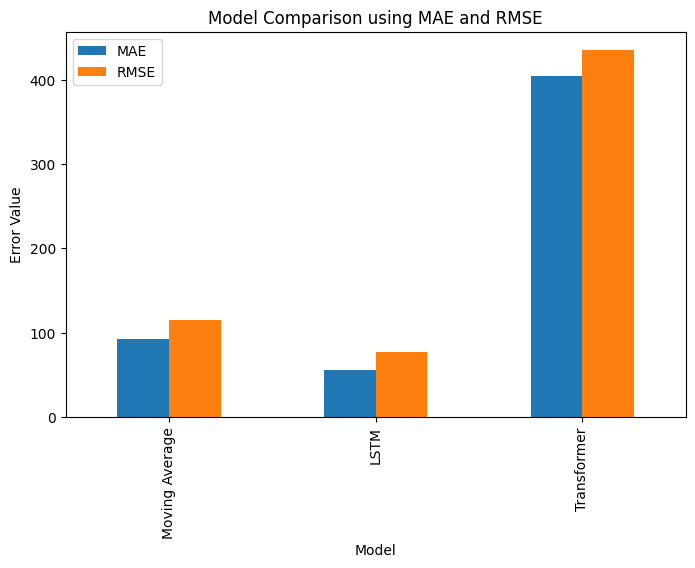

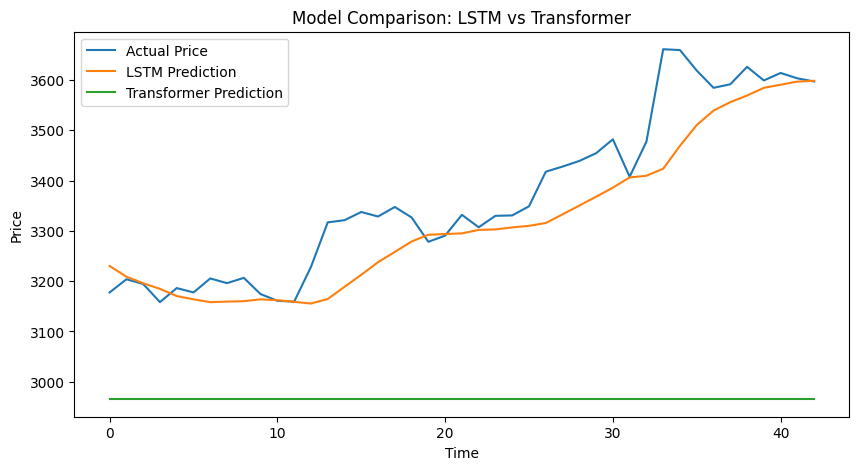

In [19]:
comparison_df = pd.DataFrame({
    "Model": ["Moving Average", "LSTM", "Transformer"],
    "MAE": [mae_ma, mae_lstm, mae_trans],
    "RMSE": [rmse_ma, rmse_lstm, rmse_trans]
})

comparison_df
comparison_df.set_index("Model").plot(kind="bar", figsize=(8,5))
plt.title("Model Comparison using MAE and RMSE")
plt.ylabel("Error Value")
plt.show()
plt.figure(figsize=(10,5))
plt.plot(y_test_actual, label="Actual Price")
plt.plot(lstm_predictions, label="LSTM Prediction")
plt.plot(transformer_predictions, label="Transformer Prediction")
plt.title("Model Comparison: LSTM vs Transformer")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()


## Conclusion
This project successfully demonstrated the application of machine learning
and deep learning models for stock price prediction.
The Moving Average model served as a simple baseline,
LSTM performed well on limited time-series data,
and the Transformer model showed smoother predictions but required larger datasets.
Overall, the project provided a strong understanding of time-series modeling
and comparative analysis of different machine learning approaches.
